# Understanding Data Breaches

Massachusettes requires organizations who suffer a data breach to notify the state attorney general if any of the victims involved live in Massachusetts. While many states have this requirement, MA has one of the more detailed laws. 

In [2]:
#import all the things

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import re

import requests

import datetime

#from dotenv import load_dotenv
import os

import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


## Preparing the Data

We start with the dataset here: https://www.mass.gov/lists/data-breach-notification-reports which was then converted using Tabula. We downloaded the 2017, 2018, and 2019 data reports. The focus is on the first six months of 2019.

In [3]:
# read breach report Read undefined values as NaN
df2019 = pd.read_csv("data/tabula-MADataBreachReport2019.csv", na_values=[0, "Undefined"])
df2019.head(5)

,Assigned_Breach_Number,Date_Reported_To_OCA,Organization_Name,Breach_Type_Description,Breach_Occur_at_the_Reporting_Entity?,MA_Residents_Affected,SSN_Breached,Account_Number_Breached,Drivers_Licenses_Breached,Credit_Debit_Numbers_Breached,Provided_Credit_Monitoring,Data_Encrypted,Mobile_Device_Lost_Stolen
0,14151,1/3/2019,Centerstone Insurance and\r\nFinancial Service...,Electronic,Yes,409.0,Yes,NaN,NaN,NaN,Yes,NaN,NaN
1,14145,1/3/2019,Ameriprise Financial,Paper,Yes,2.0,NaN,Yes,NaN,NaN,Yes,NaN,NaN
2,14146,1/3/2019,The Vanguard Group Inc,Electronic,Yes,1.0,NaN,Yes,NaN,NaN,NaN,NaN,NaN
3,14147,1/3/2019,St. Mary's Credit Union,Electronic,NaN,53.0,NaN,NaN,NaN,Yes,NaN,NaN,NaN
4,14148,1/3/2019,St. Mary's Credit Union,Electronic,NaN,1.0,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [4]:
# read breach report
df2018 = pd.read_csv("data/tabula-MADataBreachReport2018.csv", na_values=[0, "Undefined"])
df2018.head(5)

,Assigned_Breach_Number,Date_Reported_To_OCA,Organization_Name,Breach_Type_Description,Breach_Occur_at_the_Reporting_Entity?,MA_Residents_Affected,SSN_Breached,Account_Number_Breached,Drivers_Licenses_Breached,Credit_Debit_Numbers_Breached,Provided_Credit_Monitoring,Data_Encrypted,Mobile_Device_Lost_Stolen
0,12310,1/3/2018,LiveGlam Inc,Electronic,NaN,393.0,NaN,NaN,NaN,Yes,Yes,NaN,NaN
1,12303,1/3/2018,Watertown Savings Bank,Electronic,NaN,13.0,NaN,NaN,NaN,Yes,NaN,NaN,NaN
2,12304,1/3/2018,Webster Five Cents Savings\r\nBank,Electronic,NaN,56.0,NaN,NaN,NaN,Yes,NaN,NaN,NaN
3,12305,1/3/2018,"DJI Technology, Inc.",Electronic,NaN,20.0,NaN,NaN,Yes,NaN,NaN,NaN,NaN
4,12306,1/3/2018,Multnomah Athletic Club,Paper,Yes,18.0,Yes,Yes,NaN,NaN,Yes,NaN,NaN


In [5]:
# read breach report
df2017 = pd.read_csv("data/tabula-MADataBreachReport2017.csv", na_values=[0, "Undefined"])
df2017.head(5)

,Assigned_Breach_Number,Date_Reported_To_OCA,Organization_Name,Breach_Type_Description,Breach_Occur_at_the_Reporting_Entity?,MA_Residents_Affected,SSN_Breached,Account_Number_Breached,Drivers_Licenses_Breached,Credit_Debit_Numbers_Breached,Provided_Credit_Monitoring,Data_Encrypted,Mobile_Device_Lost_Stolen
0,10272,1/2/2017,"American Express Travel Related\rServices, Inc.",Electronic,NaN,11.0,NaN,NaN,NaN,Yes,NaN,NaN,NaN
1,10273,1/2/2017,American Express Travel Related\rServices Comp...,Electronic,NaN,213.0,NaN,NaN,NaN,Yes,NaN,NaN,NaN
2,10274,1/3/2017,Salem Five,Electronic,NaN,6.0,NaN,NaN,NaN,Yes,NaN,NaN,NaN
3,10275,1/3/2017,Eagle Bank,Electronic,NaN,3.0,NaN,NaN,NaN,Yes,NaN,NaN,NaN
4,10276,1/3/2017,Bank of America,NaN,Yes,2.0,Yes,Yes,NaN,NaN,Yes,NaN,NaN


In [6]:
#combine into one dataframe
#drop Data Encrypted because it was all NaN
years = pd.concat([df2019,df2018,df2017], axis=0, join='outer', join_axes=None, ignore_index=False,keys=None, levels=None, names=None, verify_integrity=False, copy=True)
years.shape

(4567, 13)

## Analysis

None of the data was encrypted, any year, any type.

Not good.

In [7]:
years.Data_Encrypted.value_counts()

Series([], Name: Data_Encrypted, dtype: int64)

In [8]:
#drop fields we don't need.
years = years.drop(["Assigned_Breach_Number","Breach_Occur_at_the_Reporting_Entity?","Data_Encrypted"], axis=1)

### Continue preparing the data

In [9]:
#Manipulate date fields
years['Breach_Date']= pd.to_datetime(years['Date_Reported_To_OCA']) 
years['Year']=pd.DatetimeIndex(years['Breach_Date']).year
years['Breach']=pd.to_datetime(years['Breach_Date']).dt.to_period('M')
years['Period']=years['Breach'].astype(str)
years.Period.replace(['2019-01', '2019-02','2019-03','2019-04','2019-05','2019-06'],'20191H', inplace=True)
years.Period.replace(['2019-07', '2019-08','2019-09','2019-10','2019-11','2019-12'],'20192H', inplace=True)
years.Period.replace(['2018-01', '2018-02','2018-03','2018-04','2018-05','2018-06'],'20181H', inplace=True)
years.Period.replace(['2018-07', '2018-08','2018-09','2018-10','2018-11','2018-12'],'20182H', inplace=True)
years.Period.replace(['2017-01', '2017-02','2017-03','2017-04','2017-05','2017-06'],'20171H', inplace=True)
years.Period.replace(['2017-07', '2017-08','2017-09','2017-10','2017-11','2017-12'],'20172H', inplace=True)
years.head(5)

,Date_Reported_To_OCA,Organization_Name,Breach_Type_Description,MA_Residents_Affected,SSN_Breached,Account_Number_Breached,Drivers_Licenses_Breached,Credit_Debit_Numbers_Breached,Provided_Credit_Monitoring,Mobile_Device_Lost_Stolen,Breach_Date,Year,Breach,Period
0,1/3/2019,Centerstone Insurance and\r\nFinancial Service...,Electronic,409.0,Yes,NaN,NaN,NaN,Yes,NaN,2019-01-03,2019,2019-01,20191H
1,1/3/2019,Ameriprise Financial,Paper,2.0,NaN,Yes,NaN,NaN,Yes,NaN,2019-01-03,2019,2019-01,20191H
2,1/3/2019,The Vanguard Group Inc,Electronic,1.0,NaN,Yes,NaN,NaN,NaN,NaN,2019-01-03,2019,2019-01,20191H
3,1/3/2019,St. Mary's Credit Union,Electronic,53.0,NaN,NaN,NaN,Yes,NaN,NaN,2019-01-03,2019,2019-01,20191H
4,1/3/2019,St. Mary's Credit Union,Electronic,1.0,NaN,Yes,NaN,NaN,NaN,NaN,2019-01-03,2019,2019-01,20191H


In [10]:
#move victim numbers
years['SSN_Breached'] = years.MA_Residents_Affected.where(years.SSN_Breached == 'Yes', years.SSN_Breached).astype(float)
years['Account_Number_Breached'] = years.MA_Residents_Affected.where(years.Account_Number_Breached == 'Yes', years.Account_Number_Breached).astype(float)
years['Drivers_Licenses_Breached'] = years.MA_Residents_Affected.where(years.Drivers_Licenses_Breached == 'Yes', years.Drivers_Licenses_Breached).astype(float)
years['Credit_Debit_Numbers_Breached'] = years.MA_Residents_Affected.where(years.Credit_Debit_Numbers_Breached == 'Yes', years.Credit_Debit_Numbers_Breached).astype(float)
years['Provided_Credit_Monitoring'] = years.MA_Residents_Affected.where(years.Provided_Credit_Monitoring == 'Yes', years.Provided_Credit_Monitoring).astype(float)
years

,Date_Reported_To_OCA,Organization_Name,Breach_Type_Description,MA_Residents_Affected,SSN_Breached,Account_Number_Breached,Drivers_Licenses_Breached,Credit_Debit_Numbers_Breached,Provided_Credit_Monitoring,Mobile_Device_Lost_Stolen,Breach_Date,Year,Breach,Period
0,1/3/2019,Centerstone Insurance and\r\nFinancial Service...,Electronic,409.0,409.0,NaN,NaN,NaN,409.0,NaN,2019-01-03,2019,2019-01,20191H
1,1/3/2019,Ameriprise Financial,Paper,2.0,NaN,2.0,NaN,NaN,2.0,NaN,2019-01-03,2019,2019-01,20191H
2,1/3/2019,The Vanguard Group Inc,Electronic,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2019-01-03,2019,2019-01,20191H
3,1/3/2019,St. Mary's Credit Union,Electronic,53.0,NaN,NaN,NaN,53.0,NaN,NaN,2019-01-03,2019,2019-01,20191H
4,1/3/2019,St. Mary's Credit Union,Electronic,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2019-01-03,2019,2019-01,20191H
5,1/3/2019,St. Mary's Credit Union,Electronic,1.0,NaN,NaN,NaN,1.0,NaN,NaN,2019-01-03,2019,2019-01,20191H
6,1/3/2019,Webster Five Cents Savings\r\nBank,Paper,6.0,NaN,NaN,NaN,6.0,NaN,NaN,2019-01-03,2019,2019-01,20191H
7,1/3/2019,St. Mary's Credit Union,Electronic,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2019-01-03,2019,2019-01,20191H
8,1/4/2019,Watertown Savings Bank,Electronic,380.0,NaN,NaN,NaN,380.0,NaN,NaN,2019-01-04,2019,2019-01,20191H
9,1/4/2019,Allianz Life Insurance Company\r\nof North Ame...,Electronic,1.0,1.0,NaN,NaN,NaN,1.0,NaN,2019-01-04,2019,2019-01,20191H


In [11]:
years.dtypes

Date_Reported_To_OCA                     object
Organization_Name                        object
Breach_Type_Description                  object
MA_Residents_Affected                   float64
SSN_Breached                            float64
Account_Number_Breached                 float64
Drivers_Licenses_Breached               float64
Credit_Debit_Numbers_Breached           float64
Provided_Credit_Monitoring              float64
Mobile_Device_Lost_Stolen                object
Breach_Date                      datetime64[ns]
Year                                      int64
Breach                                period[M]
Period                                   object
dtype: object

### Editorial Decision 0

Create a dataframe without 2017 and use that as default. The focus is on 2019 and how it compares to 2018

In [12]:
df = years.loc[(years['Year'] == 2019) | (years['Year'] == 2018)]
df.head(5)

,Date_Reported_To_OCA,Organization_Name,Breach_Type_Description,MA_Residents_Affected,SSN_Breached,Account_Number_Breached,Drivers_Licenses_Breached,Credit_Debit_Numbers_Breached,Provided_Credit_Monitoring,Mobile_Device_Lost_Stolen,Breach_Date,Year,Breach,Period
0,1/3/2019,Centerstone Insurance and\r\nFinancial Service...,Electronic,409.0,409.0,NaN,NaN,NaN,409.0,NaN,2019-01-03,2019,2019-01,20191H
1,1/3/2019,Ameriprise Financial,Paper,2.0,NaN,2.0,NaN,NaN,2.0,NaN,2019-01-03,2019,2019-01,20191H
2,1/3/2019,The Vanguard Group Inc,Electronic,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2019-01-03,2019,2019-01,20191H
3,1/3/2019,St. Mary's Credit Union,Electronic,53.0,NaN,NaN,NaN,53.0,NaN,NaN,2019-01-03,2019,2019-01,20191H
4,1/3/2019,St. Mary's Credit Union,Electronic,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2019-01-03,2019,2019-01,20191H


## Analysis 1

2019 has already had more than half the breaches as 2018 at the half-year mark.

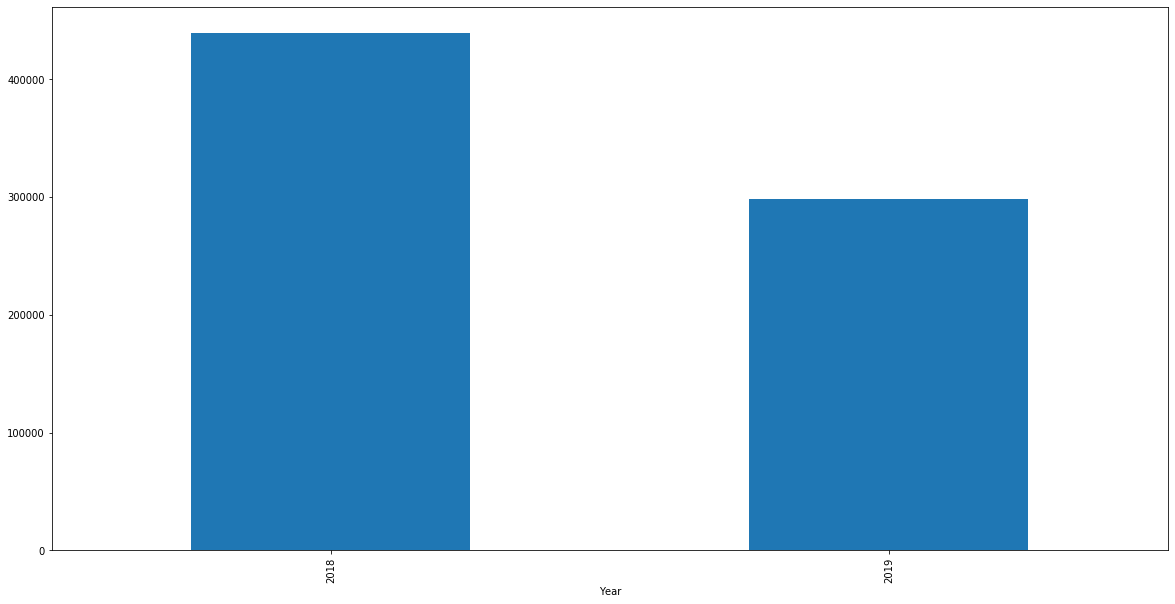

In [13]:
df.groupby('Year').MA_Residents_Affected.sum().plot(kind="bar", figsize=(20,10))
plt.savefig("compare_totals.pdf", transparent=True)

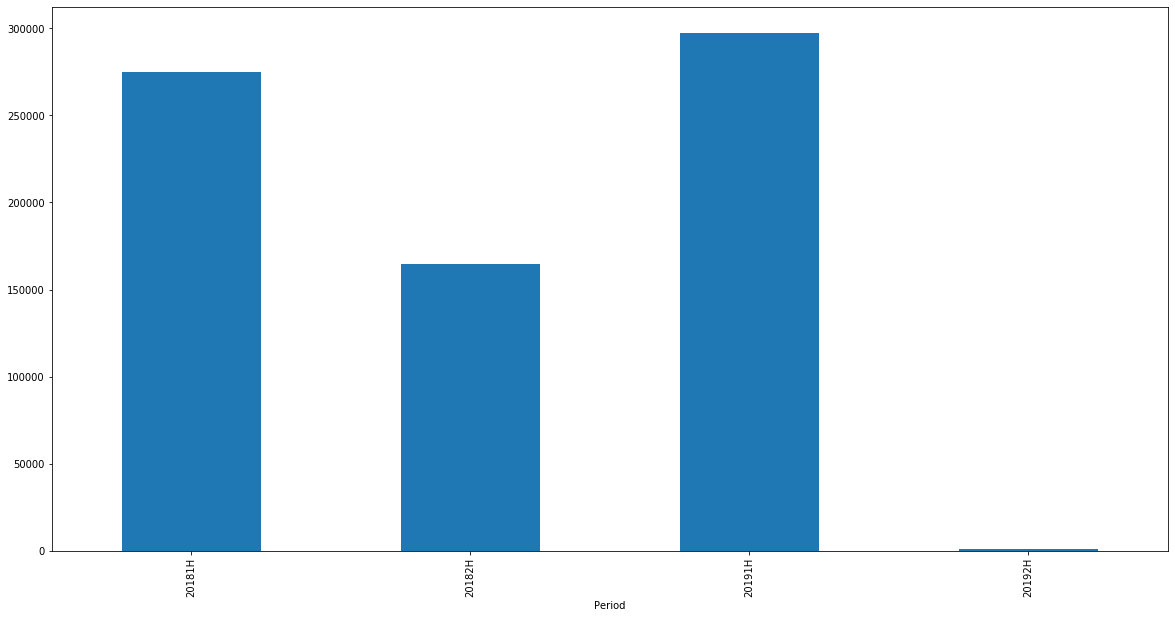

In [14]:
df.groupby('Period').MA_Residents_Affected.sum().plot(kind="bar", figsize=(20,10))
plt.savefig("compare_totals_period.pdf", transparent=True)

In [ ]:
df.groupby('Breach').MA_Residents_Affected.sum().plot(kind="barh", figsize=(20,10))

### Editorial Decision 1

I dropped the rows where the Breach Type Description was ```Undefined``` since the number of victims is overall low and there isn't a lot of information available. 

* 45 breaches, 1614 victims, but only 103 in 2019
* Only 22 in 2019 lost SSN
* 49 in 2019 lost Payment Card
* 22 in 2019 lost account number

In [ ]:
#df['Breach_Type_Description'].value_counts()
df.Breach_Type_Description.unique()

In [ ]:
df[df.Breach_Type_Description.isna()].groupby('Year').MA_Residents_Affected.sum().plot(kind="bar", figsize=(20,10))

In [ ]:
df[df.Breach_Type_Description.isna()].groupby('Period').MA_Residents_Affected.sum().plot(kind="bar", figsize=(20,10))

In [ ]:
df_na = df[df.Breach_Type_Description.isna()].groupby('Year').agg(
    {'SSN_Breached':"sum",
     'Account_Number_Breached':"sum",
     'Credit_Debit_Numbers_Breached': "sum",
     'Drivers_Licenses_Breached':"sum"
    })
df_na

In [ ]:
ax = df_na.plot.bar(rot=0, figsize=(20,10))
#df_na.groupby('Year').plot(kind="barh")

In [ ]:
df = df.dropna(subset=['Breach_Type_Description'])
df.shape

## Analysis

Continue with list of breaches that are in 2018 and 2019, and have some kind of breach_type_Description value

In [ ]:
df.groupby(['Year','Breach_Type_Description']).MA_Residents_Affected.sum()

In [ ]:
df.groupby(['Year','Breach_Type_Description']).MA_Residents_Affected.sum().plot(kind="bar", figsize=(20,10))

In [ ]:
df.groupby(['Period','Breach_Type_Description']).MA_Residents_Affected.sum().plot(kind="bar", figsize=(20,10))

Since the bulk of the records lost were from electronic breaches, limit the dataset

In [ ]:
# create electronics only dataframe
dfe=df.loc[df['Breach_Type_Description'] == 'Electronic']
#clean up columns some more
dfe = dfe.drop(["Breach_Type_Description","Date_Reported_To_OCA","Breach_Date"], axis=1)
dfe.head(5)

In [ ]:
dfe_year = dfe.groupby('Year').agg(
    {'SSN_Breached':"sum",
     'Account_Number_Breached':"sum",
     'Credit_Debit_Numbers_Breached': "sum",
     'Drivers_Licenses_Breached':"sum"
    })
dfe_year = dfe_year.reset_index()
dfe_year

In [ ]:
dfe_year.plot(x='Year', y=["SSN_Breached", "Account_Number_Breached", "Credit_Debit_Numbers_Breached","Drivers_Licenses_Breached"], kind="bar", figsize=(20,10))

In [ ]:
dfe_pd = dfe.groupby('Period').agg(
    {'SSN_Breached':"sum",
     'Account_Number_Breached':"sum",
     'Credit_Debit_Numbers_Breached': "sum",
     'Drivers_Licenses_Breached':"sum"
    })
dfe_pd = dfe_pd.reset_index()
#dfe_pd
dfe_pd.plot(x='Period', y=["SSN_Breached", "Account_Number_Breached", "Credit_Debit_Numbers_Breached","Drivers_Licenses_Breached"], kind="bar", figsize=(20,10))
plt.savefig("data_types_period.pdf", transparent=True)

In [ ]:
dfe_mo = dfe.groupby('Breach').agg(
    {'SSN_Breached':"sum",
     'Account_Number_Breached':"sum",
     'Credit_Debit_Numbers_Breached': "sum",
     'Drivers_Licenses_Breached':"sum"
    })
dfe_mo = dfe_mo.reset_index()
#dfe_mo
dfe_mo.plot(x='Breach', y=["SSN_Breached", "Account_Number_Breached", "Credit_Debit_Numbers_Breached","Drivers_Licenses_Breached"], kind="bar", figsize=(20,10))

In [ ]:
dfe.groupby('Period').SSN_Breached.sum().plot(kind="barh", figsize=(20,10))
plt.savefig("compare_ssn_period.pdf", transparent=True)

In [ ]:
dfe.groupby('Breach').SSN_Breached.sum().plot(kind="barh", figsize=(20,10))

In [ ]:
dfe_ssn_mon = dfe.groupby('Year').agg(
    {'SSN_Breached':"sum",
     'Account_Number_Breached':"sum",
     'Credit_Debit_Numbers_Breached': "sum",
     'Drivers_Licenses_Breached':"sum",
     'Provided_Credit_Monitoring':"sum"
    })
dfe_ssn_mon = dfe_ssn_mon.reset_index()
dfe_ssn_mon.plot(x='Year', y=["SSN_Breached", "Account_Number_Breached", "Credit_Debit_Numbers_Breached","Drivers_Licenses_Breached", "Provided_Credit_Monitoring"], kind="bar", figsize=(20,10))
plt.savefig("no_monitoring.pdf", transparent=True)

## Let's understand the organizations


In [ ]:
dfe_org = dfe.groupby(['Organization_Name','Year']).agg(
    {'SSN_Breached':"sum",
     'Account_Number_Breached':"sum",
     'Credit_Debit_Numbers_Breached': "sum",
     'Drivers_Licenses_Breached':"sum",
     'MA_Residents_Affected':"sum"
    })
dfe_org = dfe_org.reset_index()
dfe_org

## Analysis

In 2019, these are the 10 orgs with the most number of victims

In [ ]:
dfe_org[dfe_org['Year']==2019].groupby('Organization_Name').MA_Residents_Affected.sum().sort_values(ascending=False).head(10)

In [ ]:
dfe_org[dfe_org['Year']==2019].groupby('Organization_Name').MA_Residents_Affected.sum().sort_values(ascending=False).head(10).plot(kind="barh",figsize=(20,10))

In [ ]:
dfe_org2 = dfe.groupby(['Organization_Name','Period']).agg(
    {'SSN_Breached':"sum",
     'Account_Number_Breached':"sum",
     'Credit_Debit_Numbers_Breached': "sum",
     'Drivers_Licenses_Breached':"sum",
     'MA_Residents_Affected':"sum"
    })
dfe_org2 = dfe_org2.reset_index()
dfe_org2[dfe_org2['Period']=='20181H'].groupby('Organization_Name').MA_Residents_Affected.sum().sort_values(ascending=False).head(10).plot(kind="barh",figsize=(20,10))

In [ ]:
dfe_org2[dfe_org2['Period']=='20191H'].groupby('Organization_Name').MA_Residents_Affected.sum().sort_values(ascending=False).head(10).plot(kind="barh",figsize=(20,10))

### Ran Out of Time 

I ran out of time trying to get the RegEx on the Org Type to work. In retrospect, instead of trying to do this in DataFrame I could have done this in the actual file directly.

In [ ]:
# Very basic healthcare search
dfe_med = dfe_org[(dfe_org.Organization_Name.str.contains('[Mm]edical')) | (dfe_org.Organization_Name.str.contains('[Hh]ospital'))]
dfe_medical = dfe_med.groupby('Year').agg(
    {'SSN_Breached':"sum",
     'Account_Number_Breached':"sum",
     'Credit_Debit_Numbers_Breached': "sum",
     'Drivers_Licenses_Breached':"sum"
    })
dfe_medical = dfe_medical.reset_index()
dfe_medical.plot(x='Year', y=["SSN_Breached", "Account_Number_Breached", "Credit_Debit_Numbers_Breached","Drivers_Licenses_Breached"], kind="bar", figsize=(20,10))

In [ ]:
# Very basic healthcare search
dfe_med2 = dfe_org2[(dfe_org2.Organization_Name.str.contains('[Mm]edical')) | (dfe_org2.Organization_Name.str.contains('[Hh]ospital'))]
dfe_medical2 = dfe_med2.groupby('Period').agg(
    {'SSN_Breached':"sum",
     'Account_Number_Breached':"sum",
     'Credit_Debit_Numbers_Breached': "sum",
     'Drivers_Licenses_Breached':"sum"
    })
dfe_medical2 = dfe_medical2.reset_index()
dfe_medical2.plot(x='Period', y=["SSN_Breached", "Account_Number_Breached", "Credit_Debit_Numbers_Breached","Drivers_Licenses_Breached"], kind="bar", figsize=(20,10))
plt.savefig("healthcare_records_period.pdf", transparent=True)

In [ ]:
#not enough datapoints for a scatter plot
#dfe.plot.scatter(x='Account_Number_Breached', y='Drivers_Licenses_Breached', figsize=(20,10))